# Explore here

In [144]:
%pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sqlalchemy import create_engine

from pickle import dump


import sqlite3

In [146]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [147]:
data_X = df[["Latitude", "Longitude", "MedInc"]]
data_X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [148]:
Train_X, Test_X = train_test_split(data_X, test_size= 0.2, random_state=42)

In [149]:
Train_X.shape

(16512, 3)

In [150]:
Test_X.shape

(4128, 3)

In [151]:
data_norm = preprocessing.scale(data_X, axis= 0)

In [152]:
pca_model = PCA(n_components=2)

In [153]:
data_vis = pca_model.fit_transform(data_X)

In [154]:
data_vis

array([[ 3.26583206,  4.61584546],
       [ 3.24540791,  4.59173526],
       [ 3.29602589,  3.5539484 ],
       ...,
       [ 3.99340033, -2.10623045],
       [ 4.05436184, -1.93100809],
       [ 3.93389379, -1.41729769]])

In [155]:
data_vis.shape

(20640, 2)

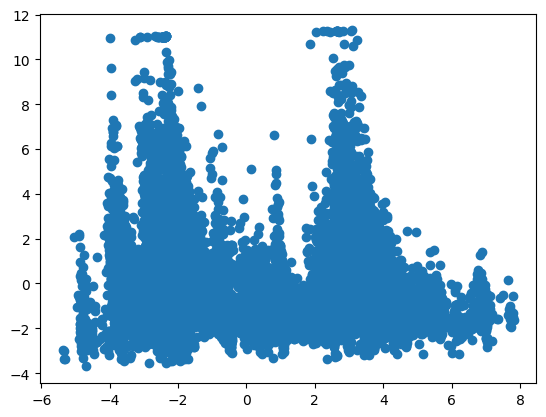

In [156]:
plt.scatter(data_vis[:,0], data_vis[:,1])

In [157]:
clustering_model = KMeans(n_clusters=6)

In [158]:
clustering_model.fit(Train_X)

KMeans(n_clusters=6)

In [159]:
Train_X["Target"]=clustering_model.labels_
Train_X.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,0
8267,33.77,-118.16,3.8125,0
17445,34.66,-120.48,4.1563,4
14265,32.69,-117.11,1.9425,0
2271,36.78,-119.80,3.5542,4


In [160]:
data_norm = preprocessing.scale(Train_X.drop("Target", axis=1), axis= 0)

In [161]:
pca_model = PCA(n_components=2)

In [162]:
data_vis = pca_model.fit_transform(data_norm)

In [163]:
print(data_vis)

[[-1.8539089  -0.405118  ]
 [-1.11876939 -0.07832147]
 [-0.01649009  0.1894366 ]
 ...
 [-0.93432834 -0.53096182]
 [ 1.43351093  1.04335752]
 [ 1.733307   -0.58433896]]


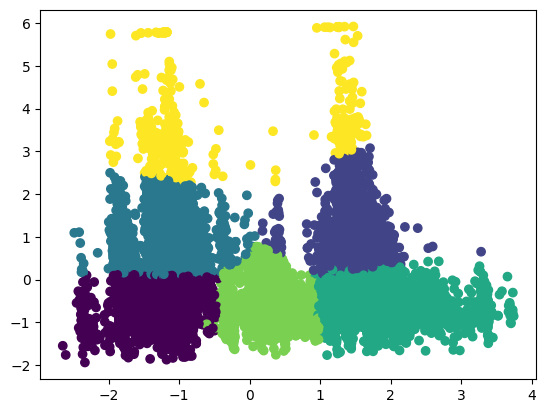

In [164]:
plt.scatter(data_vis[:,0], data_vis[:,1], c=Train_X["Target"])

In [165]:
Test_X.head()

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250


In [166]:
Train_X.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,0
8267,33.77,-118.16,3.8125,0
17445,34.66,-120.48,4.1563,4
14265,32.69,-117.11,1.9425,0
2271,36.78,-119.80,3.5542,4


In [167]:
Test_X.head()

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250


In [168]:
test_labels = clustering_model.predict(Test_X)

In [169]:
Test_X["Target"] = test_labels

In [170]:
Test_X.head()

,Latitude,Longitude,MedInc,Target
20046,36.06,-119.01,1.6812,4
3024,35.14,-119.46,2.5313,4
15663,37.80,-122.44,3.4801,3
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,3


In [171]:
y_train = Train_X.Target

In [172]:
y_test = Test_X.Target

In [173]:
Train_X = Train_X.drop("Target", axis=1)
Test_X = Test_X.drop("Target", axis=1)

In [174]:
model = SVC.fit(Train_X.values, y_train.values)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'